In [1]:
# Import relevant libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=20

In [3]:
# Load the data file path into tensorflow Image Data Generator 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10)
      
train_ds = train_datagen.flow_from_directory(
    "dataset/train/",
    target_size= (IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="sparse"
)

Found 14650 images belonging to 16 classes.


In [4]:
# Create the validation dataset
val_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10)
      
val_ds = val_datagen.flow_from_directory(
    "dataset/val/",
    target_size= (IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="sparse"
)

Found 2088 images belonging to 16 classes.


In [5]:
# Create the test dataset
test_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10)
      
test_ds = test_datagen.flow_from_directory(
    "dataset/test/",
    target_size= (IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="sparse"
)

Found 4200 images belonging to 16 classes.


In [6]:
# Get the class names programmaticallly
import pathlib
import numpy as np
data_dir = pathlib.Path("dataset/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class names from the sub directories
print(class_names)

['Corn__Common_rust' 'Pepper__bell___Bacterial_spot'
 'Pepper__bell___healthy' 'Potato___Early_blight' 'Potato___Late_blight'
 'Potato___healthy' 'Tomato_Bacterial_spot' 'Tomato_Early_blight'
 'Tomato_Late_blight' 'Tomato_Leaf_Mold' 'Tomato_Septoria_leaf_spot'
 'Tomato_Spider_mites_Two_spotted_spider_mite' 'Tomato__Target_Spot'
 'Tomato__Tomato_YellowLeaf__Curl_Virus' 'Tomato__Tomato_mosaic_virus'
 'Tomato_healthy']


In [17]:
# Build the model
model=models.Sequential([
    layers.Conv2D(32,(3,3), activation='relu',input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(len(class_names),activation='softmax')
])

model.build(input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS))

In [9]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPool2D
# from keras.layers import Activation, Flatten, Dropout, Dense


# model = Sequential()
# model.add(Conv2D(32, (3,3), padding="same", input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS), activation="relu"))
# model.add(MaxPool2D(pool_size=(3, 3)))
# model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(64, activation="relu"))
# model.add(Dense(len(class_names), activation="softmax"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [11]:
#Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
# Fit the model
history = model.fit(
    train_ds,
    steps_per_epoch=457,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    validation_steps=65,
    verbose=1,
    epochs=20
)

Epoch 1/20
457/457 [==============================] - 2582s 6s/step - loss: 1.9591 - accuracy: 0.3654 - val_loss: 1.2783 - val_accuracy: 0.5784
Epoch 2/20
376/457 [=======================>......] - ETA: 6:40 - loss: 1.0642 - accuracy: 0.6454

In [ ]:
#Save the model
model.save()

In [7]:
#Load model
model = tf.keras.models.load_model("data/")

In [8]:
# Evaluate the trained model on our test_ds
score = model.evaluate(test_ds)

132/132 [==============================] - 374s 3s/step - loss: 0.2105 - accuracy: 0.9390


first image to predict
actual label: Tomato_Late_blight
predicted label: Tomato_Late_blight


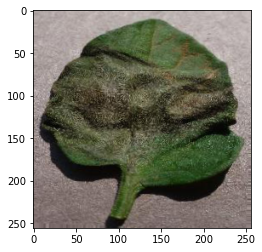

In [11]:
import numpy as np


for image_batch, label_batch in test_ds:
    
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [12]:
# Write a function for inference
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

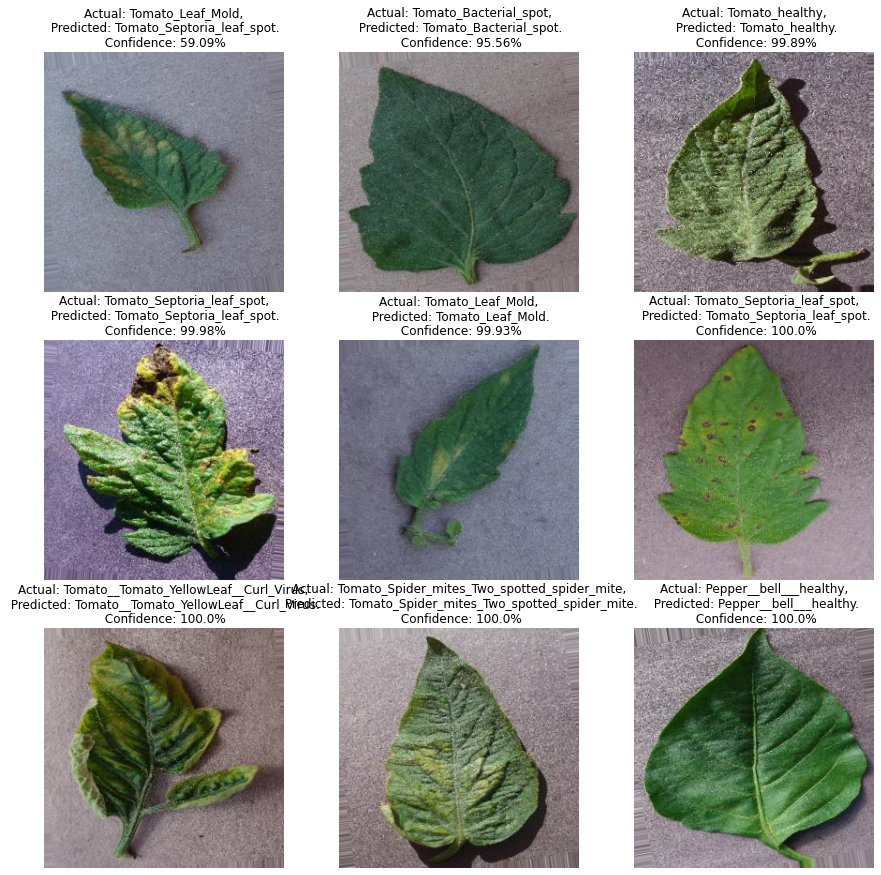

In [18]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [16]:
model_version = 3
model.save(f"saved_models/{model_version}")

INFO:tensorflow:Assets written to: saved_models/3\assets
